eps = 0.1
 j = 1999avg = 1.3241440508759852
eps = 0.01
 j = 1999avg = 1.2195034738060355
eps = 0.001
 j = 1999avg = 1.05802086491311


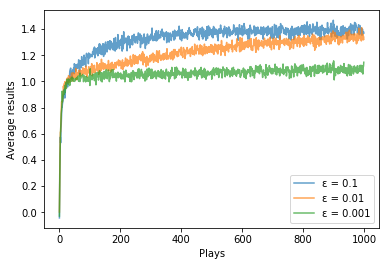

In [20]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

from scipy import misc
import imageio
import glob

from numpy.linalg import inv

from sklearn import svm

np.random.seed(42)
plays = 1000
times = 2000

def bandit(A):
    return np.random.normal(A)
    # return A

def getA(Q, eps):
    if eps < np.random.rand():
        return np.argmax(Q)
    else:
        return np.random.randint(0, 10)

def simple_bandit_algo(n, eps):
    Qs = np.random.normal(size=n)
    Q = np.zeros(n)
    N = np.zeros(n)
    win = []
    for i in range(plays):
        A = getA(Q, eps)
        R = bandit(Qs[A])
        win.append(R)
        N[A] += 1
        Q[A] += 1 / N[A] * (R - Q[A])
    return A, N, Q, win

for eps in [0.1, 0.01, 0.001]:
    print("eps = {}".format(eps))
#     possible actions
    n = 10
    avg = np.zeros(plays)
    for j in range(times):
        print("\r j = {}".format(j), end="")
        A, N, Q, win = simple_bandit_algo(n, eps)
        avg += np.array(win)
    avg /= times
    avgp=sum(avg[:])/1000
    print("avg = {}".format(avgp, end=""))

    plt.plot(np.array(list(range(plays))), avg, alpha=0.7, label="ε = {}".format(eps))
plt.xlabel('Plays')
plt.ylabel('Average results')
plt.legend()
plt.savefig('Bandits.png', bbox_inches='tight')
plt.show()